<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

### Answer:
Based of the Blood Transfusion Service Center Data Set (UCI)

##### Potential questions:
- How often are patients donating (frequency)? 
- How recently have patients donated (recency)?
- What is the total amount of blood donated by patients?
- How long have patients been donating for?

##### Actual question:
- Whether the patient would donate blood in March 2007, based on the above attributes (predictive, binary). Can a model be established that can determine whether a patient will donate?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
blood = pd.read_csv('../../../DATA/transfusion.csv')
blood.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
blood.shape

(748, 5)

In [4]:
blood.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

# Attribute Information:
- R (Recency - months since last donation), 
- F (Frequency - total number of donation), 
- M (Monetary - total blood donated in c.c.), 
- T (Time - months since first donation), and 
- a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 

In [5]:
# Rename target column as 'target' for brevity 
blood.rename(columns={'whether he/she donated blood in March 2007':'Target'},inplace=True)

In [6]:
blood.dtypes

Recency (months)         int64
Frequency (times)        int64
Monetary (c.c. blood)    int64
Time (months)            int64
Target                   int64
dtype: object

In [7]:
blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Target                 748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
blood.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
Target,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [9]:
# Check for nulls
blood.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Target                   0
dtype: int64

- confirmed no nulls

In [11]:
# target incidence (baseline accuracy)
blood['Target'].value_counts(normalize=True)

0    0.762032
1    0.237968
Name: Target, dtype: float64

- 23.8% donated, 76.2% did not

Text(0.5, 1.0, 'Target Barplot (%)')

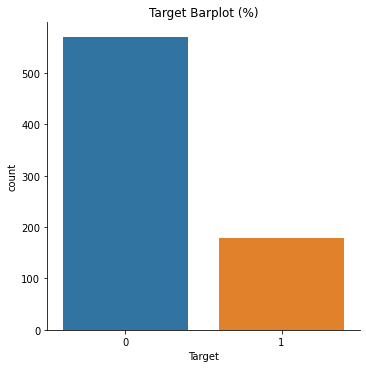

In [19]:
sns.catplot(x='Target', data=blood , kind='count' )
plt.title('Target Barplot (%)')

Text(0, 0.5, 'Frequency')

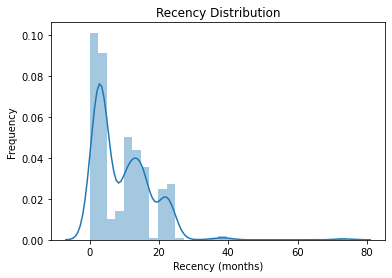

In [20]:
sns.distplot(blood['Recency (months)'])
plt.title('Recency Distribution')
plt.xlabel('Recency (months)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

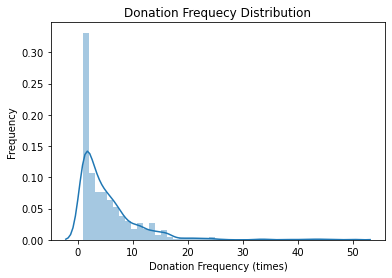

In [21]:
sns.distplot(blood['Frequency (times)'])
plt.title('Donation Frequecy Distribution')
plt.xlabel('Donation Frequency (times)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

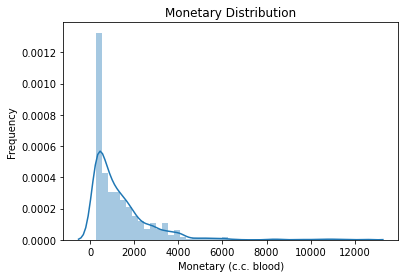

In [22]:
sns.distplot(blood['Monetary (c.c. blood)'])
plt.title('Monetary Distribution')
plt.xlabel('Monetary (c.c. blood)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

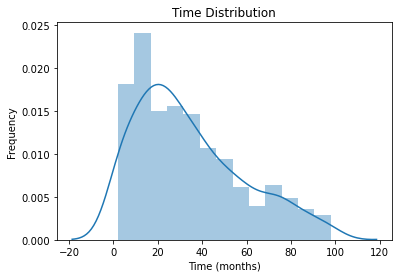

In [23]:
sns.distplot(blood['Time (months)'])
plt.title('Time Distribution')
plt.xlabel('Time (months)')
plt.ylabel('Frequency')

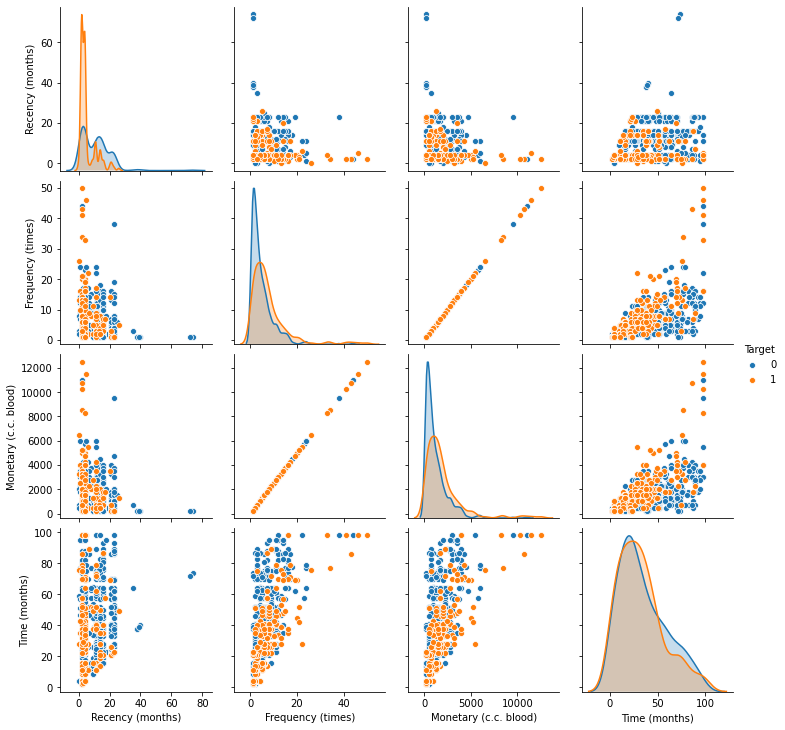

In [13]:
sns.pairplot(blood, hue='Target')

In [14]:
blood_corr = blood.corr()
blood_corr

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
Target,-0.279869,0.218633,0.218633,-0.035854,1.000000


Text(0.5, 1.0, 'Blood Transfusion Dataset Correlation Heat Map')

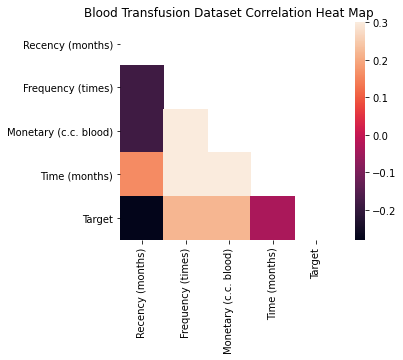

In [15]:
mask = np.zeros_like(blood_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(blood_corr, mask=mask, vmax=.3, square=True)
plt.title('Blood Transfusion Dataset Correlation Heat Map')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [24]:
# as above

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [100]:
# Set target variable (output)
y = blood['Target']

- type: binary output variable

In [101]:
# Set predictor variables (input) and show feature vector
predictor_columns = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']
X = blood[predictor_columns]
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


- Type of modelling: the model will be supervised as in a supervised learning model, the algorithm learns on a pre-labeled dataset. This will provide an answer key that the model can use to evaluate its accuracy on the training data (to be split).

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
print("Total dataset: {}".format(blood.shape))
print("Training set (75%): {}".format(X_train.shape))
print("Test set (25%): {}".format(X_test.shape))

Total dataset: (748, 5)
Training set (75%): (561, 4)
Test set (25%): (187, 4)


In [105]:
X_train

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
24,9,9,2250,16
602,9,3,750,14
399,21,3,750,26
450,23,3,750,33
332,16,6,1500,35
...,...,...,...,...
71,2,4,1000,16
106,0,8,2000,59
270,16,11,2750,40
435,16,7,1750,93


In [34]:
# Data Scaler
from sklearn.preprocessing import StandardScaler

In [106]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [123]:
# tuning hyper-parameters: using gridsearch cv ect

In [107]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Step 9: Fit the Model

In [108]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [109]:
#Predict the response for TRAIN dataset
y_pred = clf.predict(X_train)

In [110]:
# How often is the classifier correct (accuracy score)
print("TRAIN Accuracy:",metrics.accuracy_score(y_train, y_pred))

TRAIN Accuracy: 0.9500891265597148


In [111]:
# Tuning the paramters out of interest/ potential optimization
clf = DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [112]:
#Predict the response for train dataset
y_pred = clf.predict(X_train)

In [113]:
# How often is the classifier correct (accuracy score)
print("TRAIN Accuracy:",metrics.accuracy_score(y_train, y_pred))

TRAIN Accuracy: 0.8021390374331551


- improvement? not so "perfect", so chance of overfitting is reduced.

In [41]:
# Visualizing the Decision Trees
!pip install graphviz
!pip install pydotplus

     |████████████████████████████████| 278 kB 1.3 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=fb533fb63dbbc748f9770f7111ff34fcf7cd0b5ca9dc9280065972c057686e9a
  Stored in directory: /Users/annaschreiner/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [61]:
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data

In [51]:
!pip install six

In [54]:
from six import StringIO

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

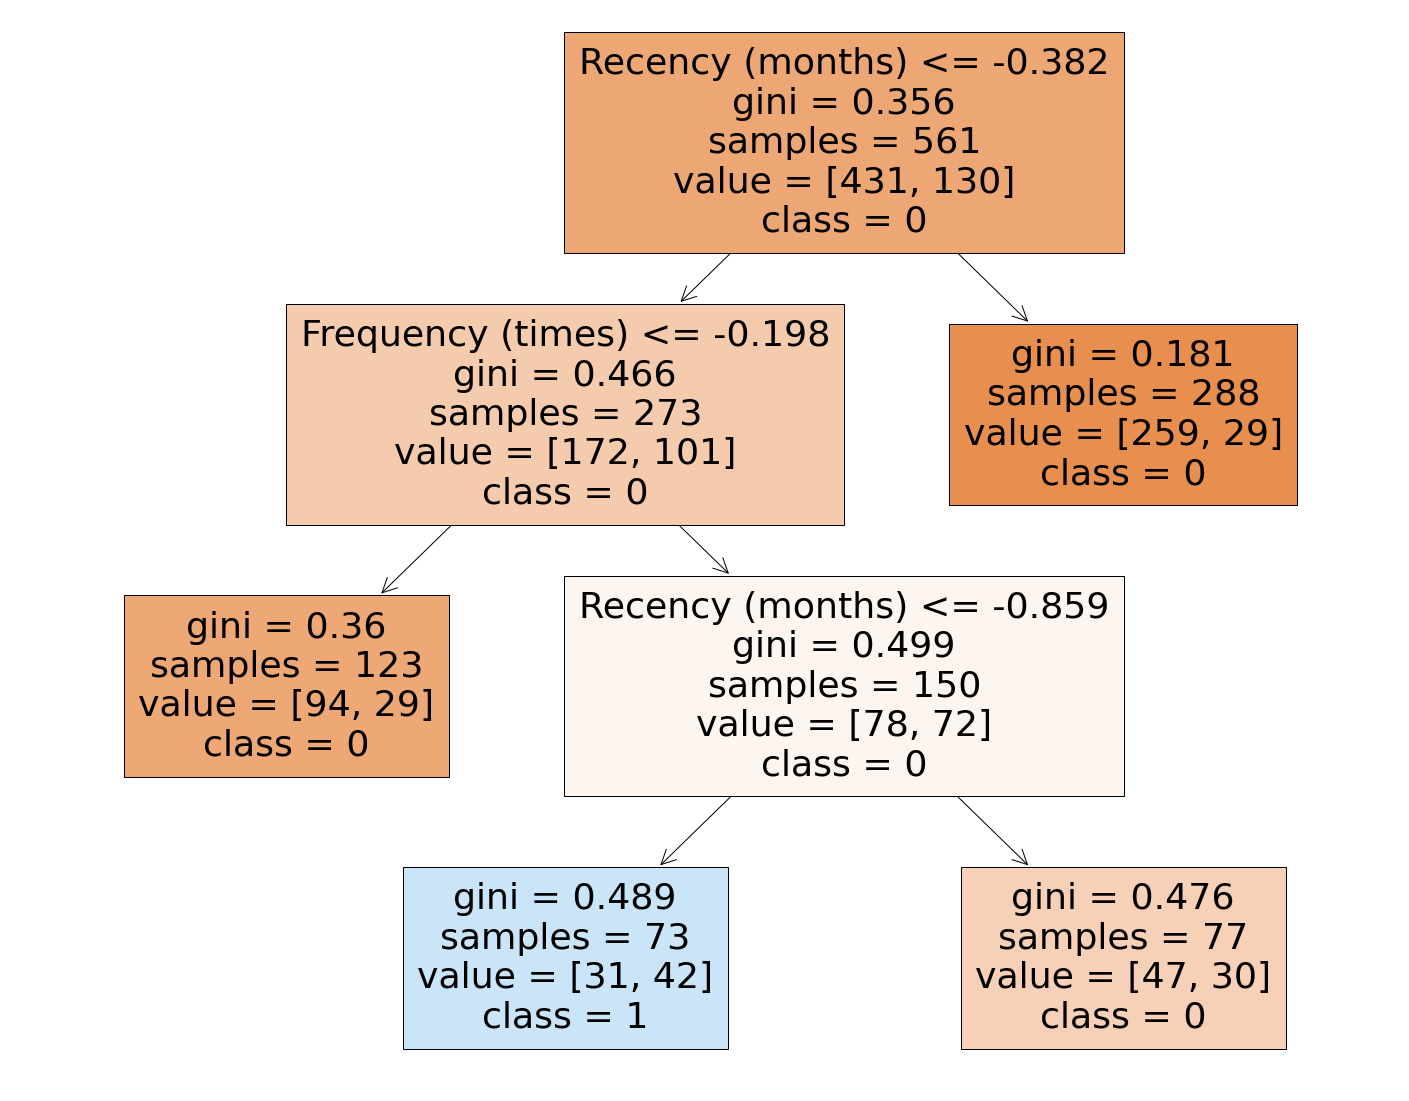

In [70]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=predictor_columns,  
                   class_names=['0','1'],
                   filled=True)

In [71]:
#to save the figure to the .png file:
fig.savefig("decistion_tree.png")

In [72]:
# helpful link for visualization! https://mljar.com/blog/visualize-decision-tree/

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [114]:
#Predict the response for TEST dataset
y_pred = clf.predict(X_test)

In [115]:
print('Training Data Accuracy = {:7.4f}'.format(clf.score(X_train, y_train)))

Training Data Accuracy =  0.8021


In [116]:
print('Test Data Accuracy = {:7.4f}'.format(clf.score(X_test, y_test)))

Test Data Accuracy =  0.7754


- over fitting as training set has a higher accuracy that the test - but not so bad! Overfitting occurs when the model is too closely fitted to the training data, which reduces the ability to generallize. 

In [98]:
from sklearn import metrics
from sklearn.metrics import roc_curve,confusion_matrix,auc

In [117]:
#confusion matrix:
con_matrix = metrics.confusion_matrix(y_test, y_pred)
print(con_matrix)

#[row, column]
TP = con_matrix[1, 1]
TN = con_matrix[0, 0]
FP = con_matrix[0, 1]
FN = con_matrix[1, 0]

[[130   9]
 [ 33  15]]


In [118]:
# As a readable dataframe:
pd.DataFrame(con_matrix, index=['Donated', 'Did Not Donate'], columns=['Predicted Donation','Predicted No Donation'])

,Predicted Donation,Predicted No Donation
Donated,130,9
Did Not Donate,33,15


In [119]:
# Classification Report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       139
           1       0.62      0.31      0.42        48

    accuracy                           0.78       187
   macro avg       0.71      0.62      0.64       187
weighted avg       0.75      0.78      0.75       187



In [122]:
# the classifier is precise (when a positive value is correctly predicted) 62% of the time
# the classifier's sensitivity (recall) suggests that when a true value is positive, the prediction is correct only 31% of the time. Not very high! You want to be able to maximse this number.

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

Evaluation Notes:
- the classifier is precise (when a positive value is correctly predicted) 62% of the time
- the classifier's sensitivity (recall) suggests that when a true value is positive, the prediction is correct only 31% of the time. Not very high! You want to be able to maximse this number.
- Very low sensitivity of 31% suggests that this model is not the best model for optimizing predictions of patient blood donations in the future. Overfitting was expected when implementing decision trees, and this was confirmed in the output.
- to summarise, input variables from new datasets that will be used to predice the outcome need to be very similar to the initial set that the model was trained on. This is due to the models "overfitting" nature - or rather, it's lowered ability to generalize.

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



